In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
alpha = 0.5
beta = 0.5
sigma=1
N=300
M=150

In [4]:
eps = np.random.randn(M, N)
print(eps.shape)
eps = np.concatenate((np.zeros(shape=(M, 2)), eps), axis=1) * sigma
print(eps.shape)

(150, 300)
(150, 302)


In [5]:
xi = eps[:, 2:] * (1 + alpha * eps[:, 1:N+1] + beta * eps[:, :N])
print(xi.shape)
xi = xi.cumsum(axis=1)
print(xi.shape)

(150, 300)
(150, 300)


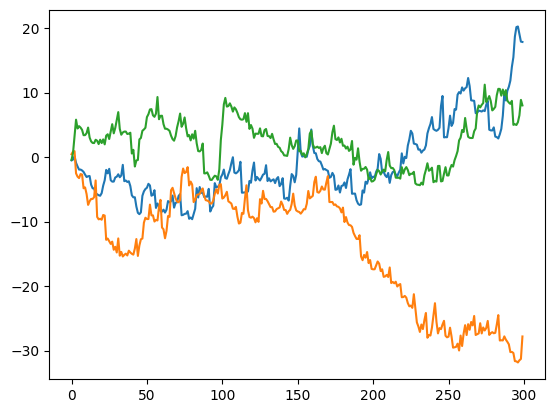

In [6]:
plt.plot(xi[0, :])
plt.plot(xi[1, :])
plt.plot(xi[2, :])
plt.show()

In [7]:
variation = sigma * (1 + alpha * eps[:, 2:] + beta * eps[:, 1:N+1])**2
variation = variation.sum(axis=1)
print(variation.shape)

(150,)


0.0882 0.9655


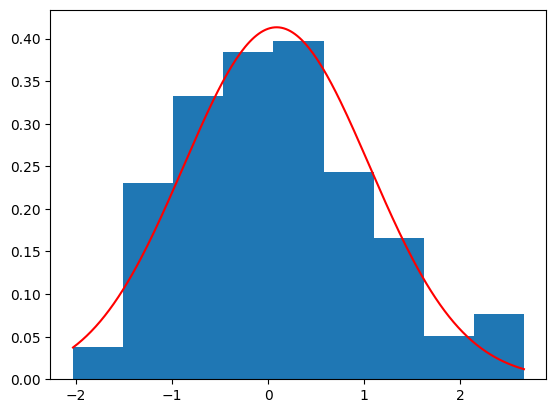

In [8]:
xi_new = xi[:, -1] / variation**0.5
plt.hist(xi_new, bins=int(np.log2(xi_new.shape[0]) + 2), density=True)

mu_hat, sigma_hat = np.mean(xi_new), np.std(xi_new, ddof=1)
x_vals = np.linspace(min(xi_new), max(xi_new), 200)
plt.plot(x_vals, stats.norm.pdf(x_vals, mu_hat, sigma_hat), 'r', label='Normal PDF')

print(f"{mu_hat:.4f}", f"{sigma_hat:.4f}")

plt.show()

In [9]:
n_bins = 10
freq_obs, bin_edges = np.histogram(xi_new, bins=n_bins)
cdf_vals = stats.norm.cdf(bin_edges, mu_hat, sigma_hat)
freq_exp = len(xi_new) * np.diff(cdf_vals)

chi2_stat = np.sum((freq_obs - freq_exp)**2 / freq_exp)
df = n_bins - 1 - 2  # минус число оцененных параметров (mu, sigma)
p_value = 1 - stats.chi2.cdf(chi2_stat, df)

print(f"chi^2 = {chi2_stat:.3f}, df = {df}, p = {p_value:.4f}")
if p_value > 0.05:
    print("выборка согласуется с нормальным распределением")
else:
    print("выборка не согласуется с нормальным распределением")

chi^2 = 9.621, df = 7, p = 0.2111
выборка согласуется с нормальным распределением


## Rademacher

In [10]:
eps = np.random.choice([-sigma**0.5, sigma**0.5], size=(M, N)) # scaled Rademacher
eps = np.concatenate((np.zeros(shape=(M, 2)), eps), axis=1) * sigma

xi = eps[:, 2:] * (1 + alpha * eps[:, 1:N+1] + beta * eps[:, :N])
xi = xi.cumsum(axis=1)

variation = sigma * (1 + alpha * eps[:, 2:] + beta * eps[:, 1:N+1])**2
variation = variation.sum(axis=1)

xi_R = xi[:, -1] / variation**0.5
print(xi_R.shape)

(150,)


### Normal

In [11]:
eps = np.random.normal(loc=0, scale=sigma, size=(M, N))
eps = np.concatenate((np.zeros(shape=(M, 2)), eps), axis=1) * sigma

xi = eps[:, 2:] * (1 + alpha * eps[:, 1:N+1] + beta * eps[:, :N])
xi = xi.cumsum(axis=1)

variation = sigma * (1 + alpha * eps[:, 2:] + beta * eps[:, 1:N+1])**2
variation = variation.sum(axis=1)

xi_N = xi[:, -1] / variation**0.5
print(xi_N.shape)

(150,)


### Uniform

In [12]:
a = -np.sqrt(3 * sigma)
b = np.sqrt(3 * sigma)

eps = np.random.uniform(a, b, size=(M, N))
eps = np.concatenate((np.zeros(shape=(M, 2)), eps), axis=1) * sigma

xi = eps[:, 2:] * (1 + alpha * eps[:, 1:N+1] + beta * eps[:, :N])
xi = xi.cumsum(axis=1)

variation = sigma * (1 + alpha * eps[:, 2:] + beta * eps[:, 1:N+1])**2
variation = variation.sum(axis=1)

xi_U = xi[:, -1] / variation**0.5
print(xi_U.shape)

(150,)


## Comparing

In [13]:
D, p_value = stats.ks_2samp(xi_R, xi_N)

print("KS-тесты:")
print(f"Rademacher vs Normal: KS = {D:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("согласуются")
else:
    print("не согласуются")

D, p_value = stats.ks_2samp(xi_R, xi_U)

print(f"Rademacher vs Uniform: KS = {D:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("согласуются")
else:
    print("не согласуются")

D, p_value = stats.ks_2samp(xi_N, xi_U)

print(f"Normal vs Uniform: KS = {D:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("согласуются")
else:
    print("не согласуются")

KS-тесты:
Rademacher vs Normal: KS = 0.1267, p-value = 0.1804
согласуются
Rademacher vs Uniform: KS = 0.0867, p-value = 0.6279
согласуются
Normal vs Uniform: KS = 0.0933, p-value = 0.5322
согласуются
